In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
### use atomic units so that m = e = hbar = 1

L = 1 # width of the well in a.u. (i.e. 1 bohr radius)
nmax = 300 # number of x values
step = L / nmax # step in x values
num = 20 # number of eigenfunctions

# Gaussian pulse
sigma = L / 20 # standard deviation (width) of gaussian
mu = L / 5 # expected position (centres gaussian)


In [3]:
def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
    

In [4]:
def psi(n, x, L):
    return np.sqrt(2 / L) * np.sin(np.pi * n * x / L)

In [5]:
# two arrays, g_squared (regular gaussian, the probability distribution) and g (wavefunction)
g = np.empty(nmax)
for x in np.arange(0, nmax, 1):
    g[x] = np.sqrt(gaussian(x * step, mu, sigma))



In [6]:
# a n-dimensional array (n = num) of eigenfunctiona
eigs = np.empty((num, nmax))

for i in range(0, num): 
    for x in np.arange(0, nmax, 1):
        eigs[i, x] = psi(i + 1, x * step, L) 

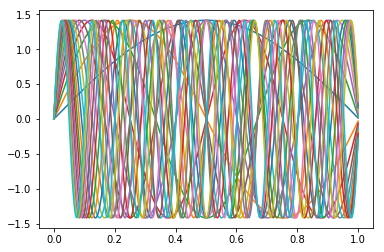

In [7]:
# plotting the n eigenfunctions
xs = np.linspace(0, 1, nmax)

for i in range(0, num):
    plt.plot(xs, eigs[i])

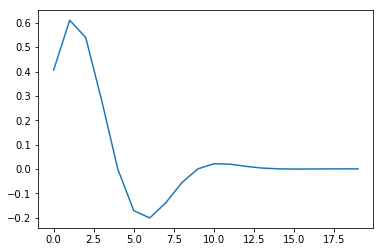

In [8]:
# calculating the weighting of each eigenfunction, shifting g affects cn and thereby shifts the wavepacket
cn = np.zeros(num)

for i in range(0, num):
    cn[i] = step * sum(g * eigs[i])
    
plt.plot(cn)

In [9]:
# calculating the energy eigenvalues for each eigenfunction
energy = np.zeros(num)

for i in range(0, num):
    energy[i] = (i + 1)**2 * np.pi / (2 * L**2)

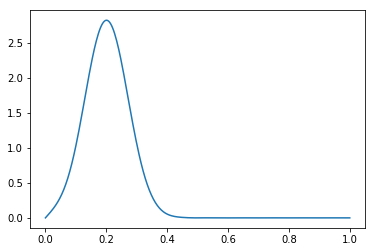

In [10]:
# finding the wavefunction from a linear sum of the n eigenfunctions, and plotting to check the shape matches our
# original gaussian (at t = 0)
psi_0 = 0
for i in range(0, num):
    psi_0 = psi_0 + cn[i] * eigs[i]
    
plt.plot(xs, psi_0)
#plt.plot(xs, g)

In [11]:
def animate(t):
    """
    this function gets called by animation (imported from matplotlib)
    each time called, it will replot with a different values for t
    
    Parameters:
        t : float
            used as a counter to display different frames of the animation 
    
    """
    
    # calculating the energy eigenvalues for each eigenfunction
    energy = np.zeros(num)

    for i in range(0, num):
        energy[i] = ((i + 1)* np.pi)**2 * np.pi / (2 * L**2) 
    
    # create our wavefunction object
    obj = 0
    for i in range(0, num):
        obj = obj + cn[i] * eigs[i] * np.exp(-1j * energy[i] * t) 
        
    real.set_ydata(obj.real)
    imag.set_ydata(obj.imag)
    mag.set_ydata(np.sqrt(obj.real**2 + obj.imag**2))
    
    # create prob. dist. object
    prob.set_ydata(obj.real**2 + obj.imag**2)


<IPython.core.display.Javascript object>


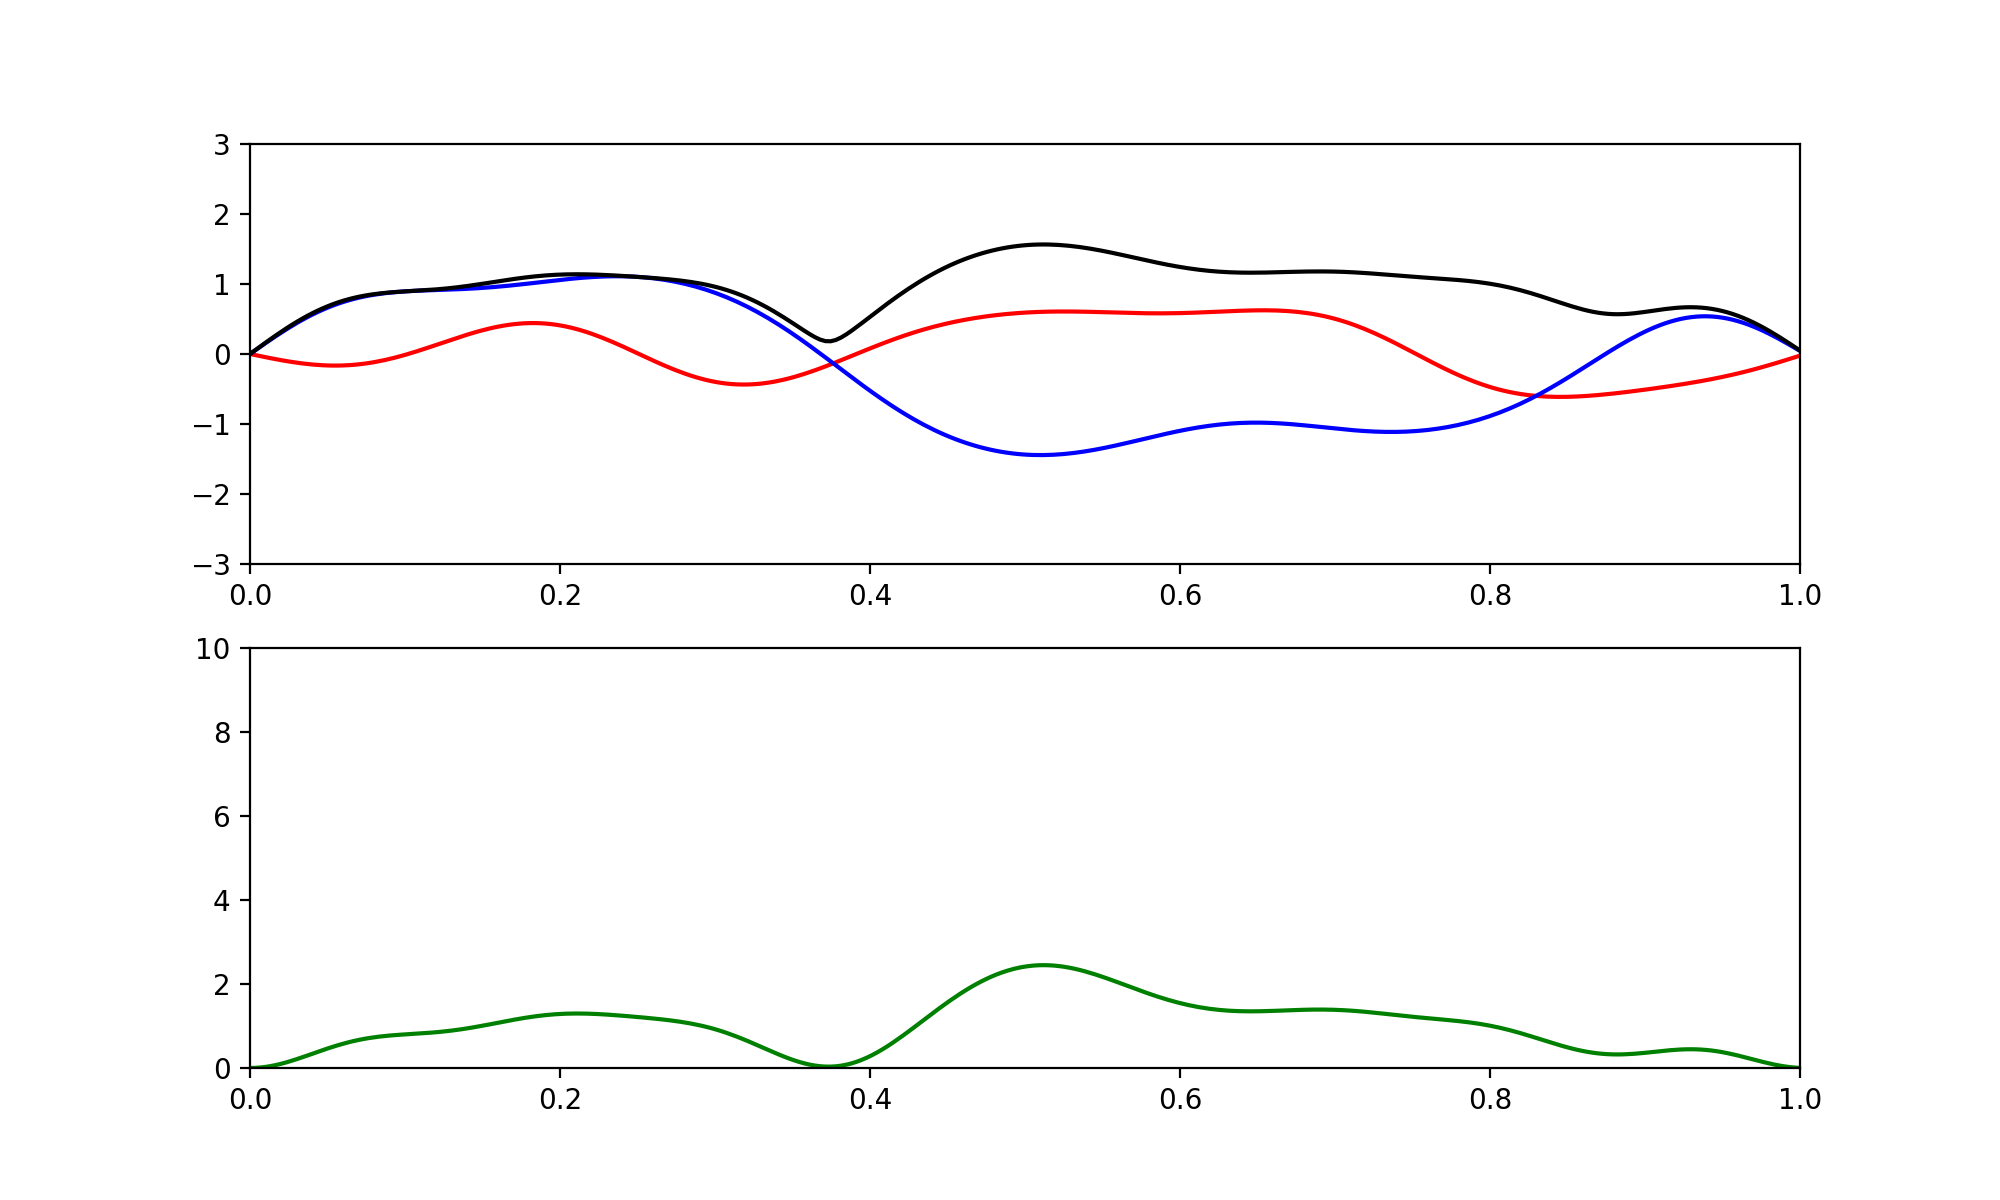

In [16]:
%matplotlib notebook

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 6))

# creating our line objects for the plots (initialise the plots)
real, = ax1.plot(xs, eigs[1], '-r') 
imag, = ax1.plot(xs, eigs[1], '-b') 
mag, = ax1.plot(xs, eigs[1], '-k')
prob, = ax2.plot(xs, eigs[1], '-g')


def init():
    """
    initialize the figure object 
    
    Returns:
        wave_real : a line object that will form the first frame of the plot
        
        wave_imag : see above
        
        prob : see above
        
        wave_mag : see above
    
    """
    
    ax1.set_xlim(0, 1)
    ax1.set_ylim(-3, 3)
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 10)
    
    return real, imag, mag, prob

# the FuncAnimation function iterates through our animate function using the steps array
dt = 0.0005 # stepsize of the widths 
ts = np.arange(0, 2000, dt)
ani = FuncAnimation(fig, animate, ts, init_func=init, interval=25, blit=True) 
    # animation object, give it the figure object, the animate function, the input for the animate function,
    # the intialising function, interval - amount of time between each frame, blitting reduces time

plt.show()

In [13]:
help(FuncAnimation)

Help on class FuncAnimation in module matplotlib.animation:

class FuncAnimation(TimedAnimation)
 |  FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, **kwargs)
 |  
 |  Makes an animation by repeatedly calling a function *func*.
 |  
 |  Parameters
 |  ----------
 |  fig : matplotlib.figure.Figure
 |     The figure object that is used to get draw, resize, and any
 |     other needed events.
 |  
 |  func : callable
 |     The function to call at each frame.  The first argument will
 |     be the next value in *frames*.   Any additional positional
 |     arguments can be supplied via the *fargs* parameter.
 |  
 |     The required signature is::
 |  
 |        def func(frame, *fargs) -> iterable_of_artists
 |  
 |     If ``blit == True``, *func* must return an iterable of all artists
 |     that were modified or created. This information is used by the blitting
 |     algorithm to determine which parts of the figure have to be updated.
 |     The return

<IPython.core.display.Javascript object>


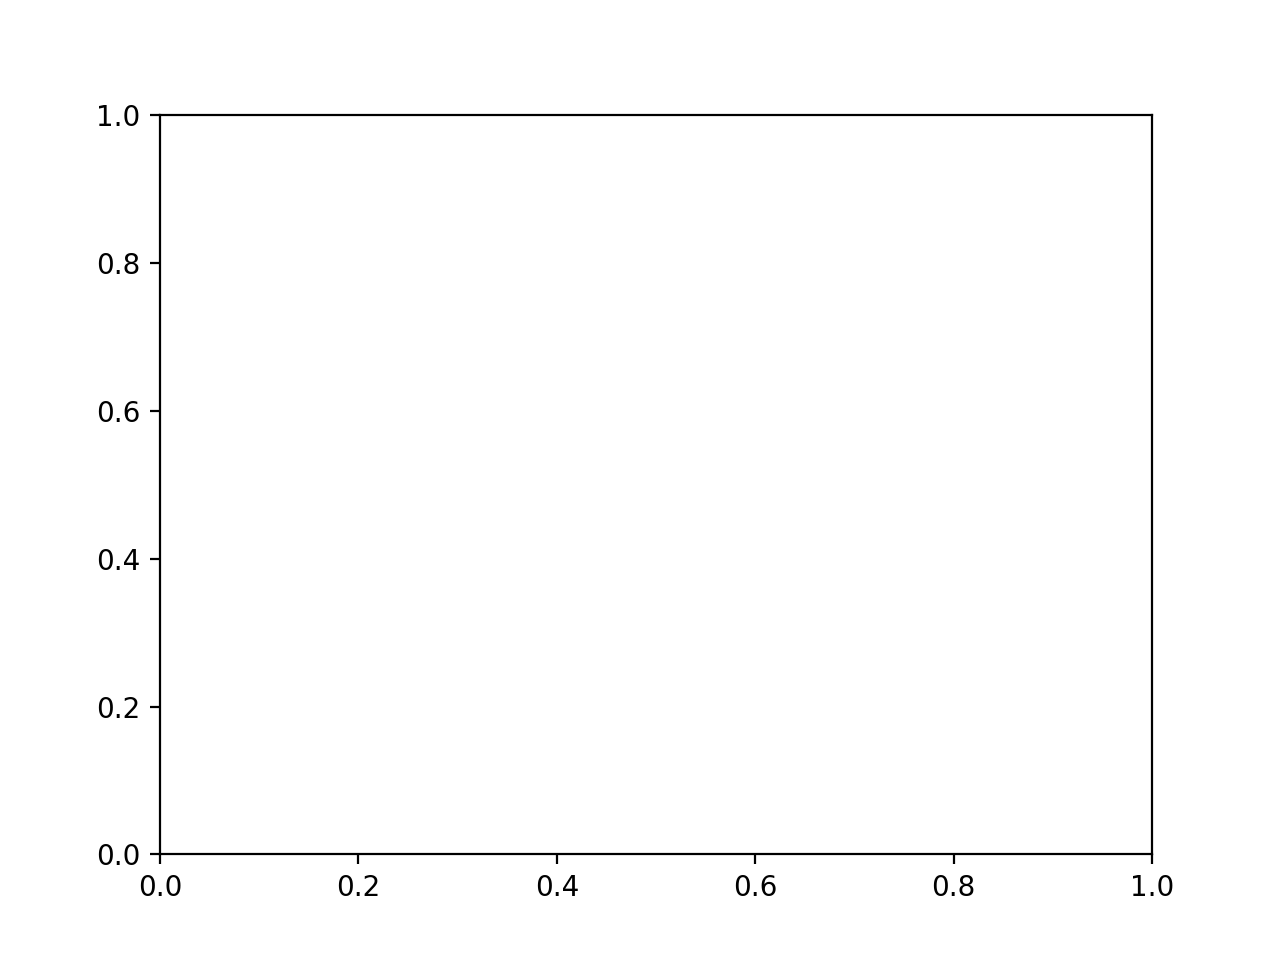

In [14]:
fig, ax = plt.subplots();

In [15]:
np.zeros(num)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])